# K- Means Clustering (Mall Customers' Spending Score Clustering


## Importing Neccessary Libraries and dataset

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [17]:
df=pd.read_csv('Mall_Customers.csv')
print(df.head())
X=df.iloc[:,1:]

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Exploratory Data Analysis

### Checking for missing values

In [18]:
print(df.isnull().sum())
print(X)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
      Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


### Implementing OneHotEncoder for Genre(gender) column

In [19]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=ct.fit_transform(X)

In [20]:
print(X)

[[  0.   1.  19.  15.  39.]
 [  0.   1.  21.  15.  81.]
 [  1.   0.  20.  16.   6.]
 [  1.   0.  23.  16.  77.]
 [  1.   0.  31.  17.  40.]
 [  1.   0.  22.  17.  76.]
 [  1.   0.  35.  18.   6.]
 [  1.   0.  23.  18.  94.]
 [  0.   1.  64.  19.   3.]
 [  1.   0.  30.  19.  72.]
 [  0.   1.  67.  19.  14.]
 [  1.   0.  35.  19.  99.]
 [  1.   0.  58.  20.  15.]
 [  1.   0.  24.  20.  77.]
 [  0.   1.  37.  20.  13.]
 [  0.   1.  22.  20.  79.]
 [  1.   0.  35.  21.  35.]
 [  0.   1.  20.  21.  66.]
 [  0.   1.  52.  23.  29.]
 [  1.   0.  35.  23.  98.]
 [  0.   1.  35.  24.  35.]
 [  0.   1.  25.  24.  73.]
 [  1.   0.  46.  25.   5.]
 [  0.   1.  31.  25.  73.]
 [  1.   0.  54.  28.  14.]
 [  0.   1.  29.  28.  82.]
 [  1.   0.  45.  28.  32.]
 [  0.   1.  35.  28.  61.]
 [  1.   0.  40.  29.  31.]
 [  1.   0.  23.  29.  87.]
 [  0.   1.  60.  30.   4.]
 [  1.   0.  21.  30.  73.]
 [  0.   1.  53.  33.   4.]
 [  0.   1.  18.  33.  92.]
 [  1.   0.  49.  33.  14.]
 [  1.   0.  21.  33

In [21]:

column_names=['Genre_male','Genre_female','Age','Annual Income (k$)','Spending Score (1-100)']
X=pd.DataFrame(X,columns=column_names)

<Figure size 3000x1000 with 0 Axes>

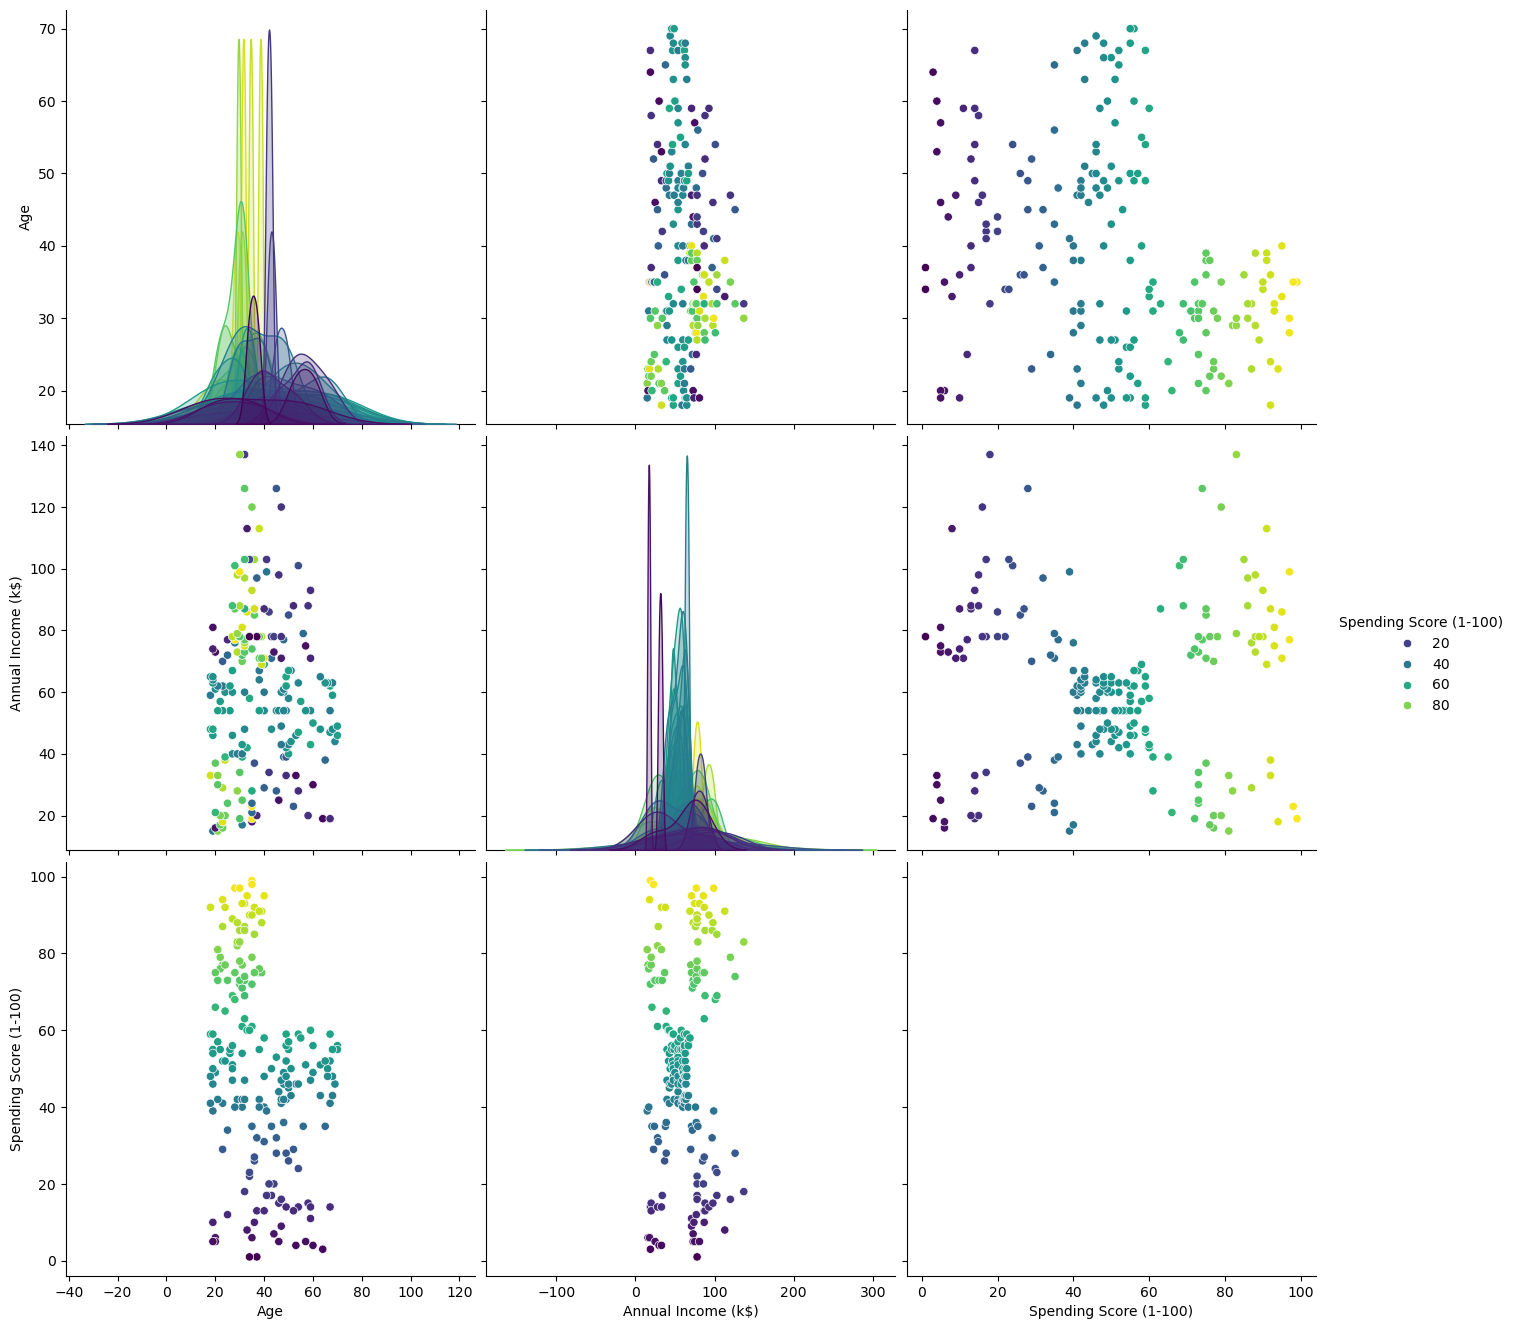

In [22]:
plt.figure(figsize=(30,10))
sns.pairplot(df,vars=['Age','Annual Income (k$)','Spending Score (1-100)'],hue='Spending Score (1-100)',palette='viridis',height=4.5)

In [23]:

X.corr()

,Genre_male,Genre_female,Age,Annual Income (k$),Spending Score (1-100)
Genre_male,1.000000,-1.000000,-0.060867,-0.056410,0.058109
Genre_female,-1.000000,1.000000,0.060867,0.056410,-0.058109
Age,-0.060867,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.058109,-0.327227,0.009903,1.000000


### -1 correlation between the columns Genre_male and Genre_female shows perfect multicollinearity which is not good for our agglomerative clustring


<Axes: >

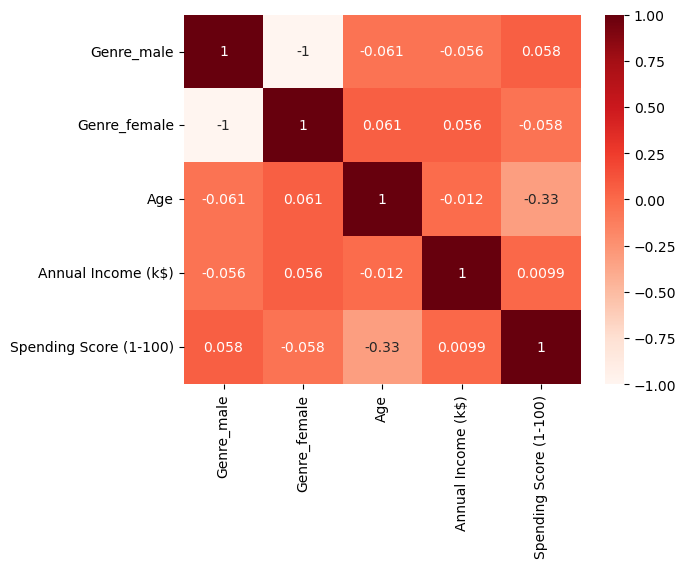

In [24]:
sns.heatmap(X.corr(),annot=True,cmap='Reds',cbar=True)

 ## We will make 2 disctinct models
 ## 1. Two dimensions (Annual Income and Spending Score) so it is easily visualized .
 ## 2. Four dimensions(We exclude genre_male, we use genre_female,age, annual income and spending score)

# 2D model 

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

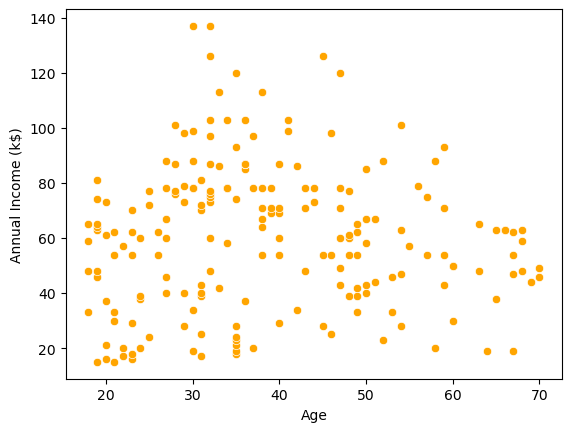

In [25]:
sns.scatterplot(data=df,x='Age',y='Annual Income (k$)',color='orange')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

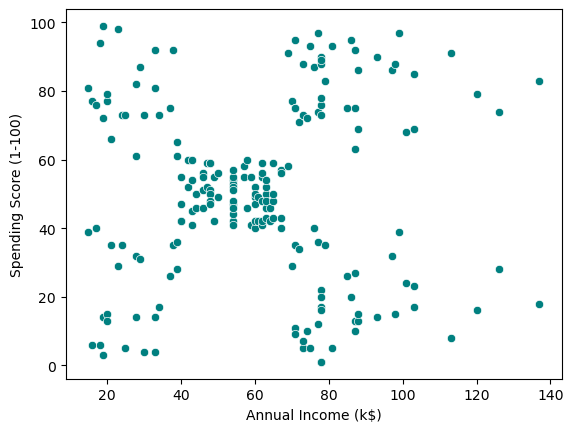

In [26]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',color='teal')

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

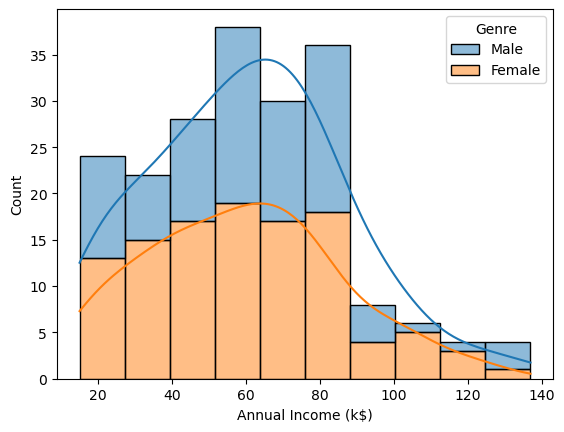

In [27]:
sns.histplot(data=df,x='Annual Income (k$)',kde=True, hue="Genre", multiple="stack")

## Feature Scaling the Columns

In [30]:
sc=StandardScaler()
X=np.array(X)
X=sc.fit_transform(X)
X=X[:,3:5]
print(X)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

## In the K - means algorithm we using something called the Elbow method which we find out the optimal clusters. 

### First we find out the WCSS ( which is the Within Cluster Sum of Squares for different values of clusters eg K=2,3,4,5,6,7 and plot the graph, we then find out where the value of WCSS stops dropping over large values and that would be our desired number of clusters

## ELBOW METHOD

C:\Users\anand\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anand\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anand\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anand\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

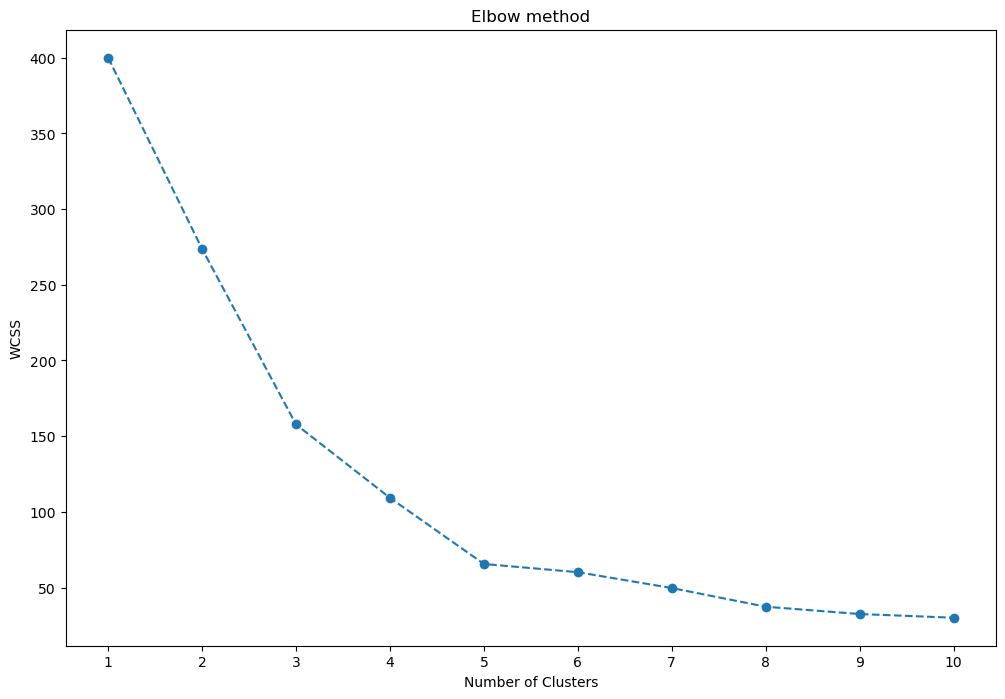

In [35]:
plt.figure(figsize=(12,8))
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,linestyle='--',marker='o')
plt.xticks(range(1,11))
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## We see that the WCSS decreases very slowly from X=5, therefore the optimal amount of clusters =5

## Applying K menas to k=5

In [36]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_hc=kmeans.fit_predict(X)
print(y_hc)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


C:\Users\anand\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Plotting the Clusters on Annual income vs Spending score graph for 2d Analysis

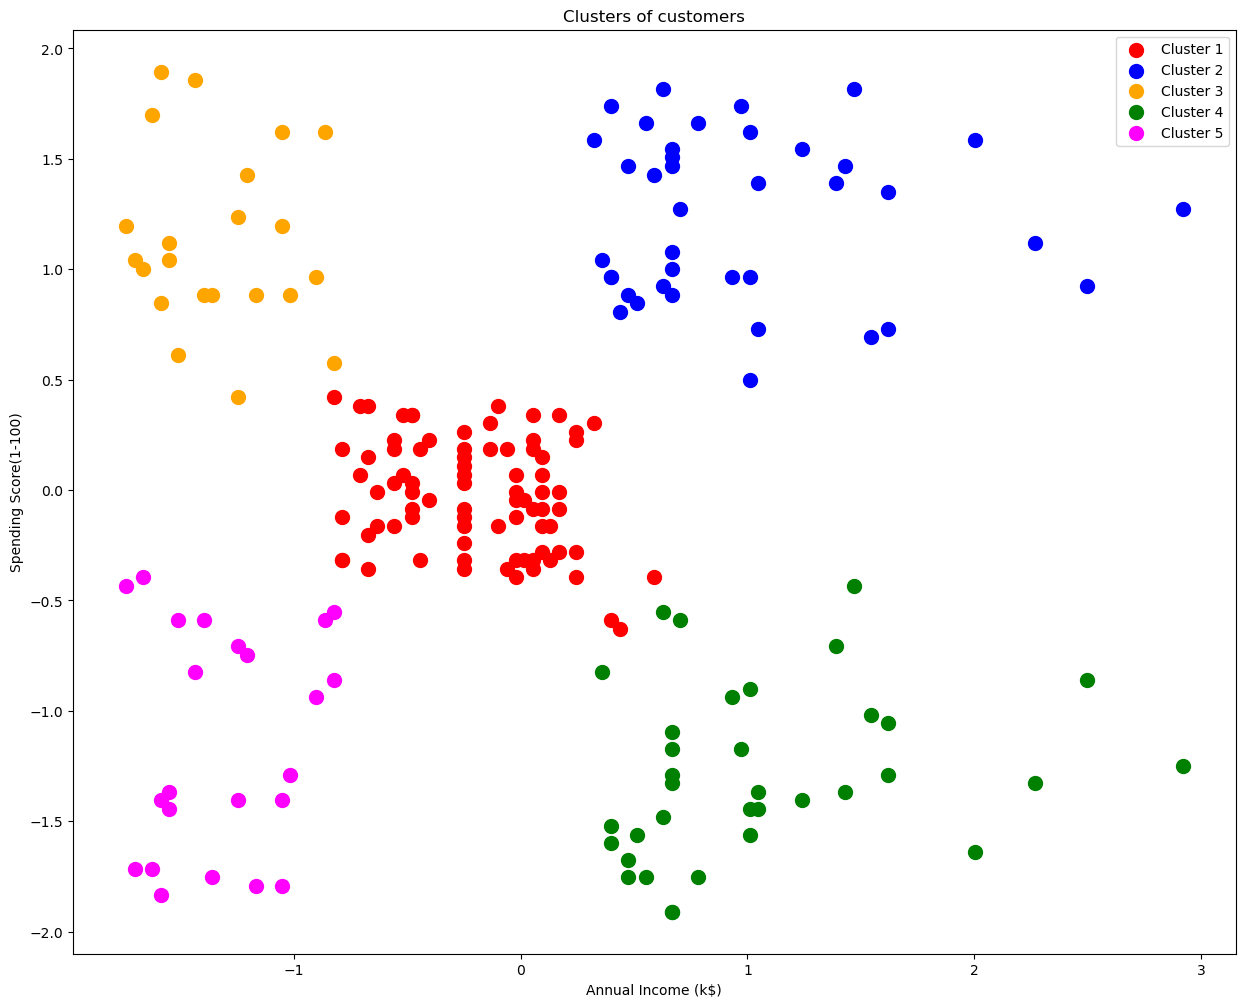

In [37]:
plt.figure(figsize=(15,12))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='orange',label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='green',label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

### As you can see, it has been clustered into 5 near equal clusters

### We cannot visualize this as it is 4 dimensional this is why i implemented a 2d as well as a 4d model

# RESULTS

##  Clustering Results 

I performed K means clustering using the dataset Mall customers using 2 dimensions as is it was most optimal. Using the Elbow method I determined the optimal amount of clusters by plotting WCSS of k=1-11, the optimal amount of clusters =5

### 1. Two-Dimensional (2D) Analysis

* **Features Used:** `Annual Income (k$)` and `Spending Score (1-100)`
* **Optimal Clusters:** 5

By clustering only on income and spending, from the dendrogram I identified **5 distinct customer segments**, which represent the classic marketing profiles:
* Careful (Low Income, Low Spending)
* Standard (Average Income, Average Spending)
* Target (High Income, High Spending)
* Careless (Low Income, High Spending)
* Miser (High Income, Low Spending)

This 2D model K means provides a clear and visually intuitive segmentation based on the primary drivers of purchasing behavior.



## Final Result as it is easy to read we take the 2 Dimensional analysis and we target the induviduals who are in clusters 1.Target (High Income, High Spending) and Miser(High Income , Low Spending) for advertisements and marketing calls